In [1]:
import datetime
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preprocessing

Read 2 dataset: movies and actresses

In [2]:
train_actress = pd.read_csv("input/actress.csv")
train_movie = pd.read_csv("input/movies.csv")

In [3]:
train_actress.head()

,hip,siteUrl,waist,imageUrl,prefectures,japanName,bust,height,birthday,hobby,id,name
0,88,http://www.dmm.co.jp/digital/videoa/-/list/=/a...,60,https://pics.dmm.co.jp/mono/actjpgs/kitagawa_y...,NaN,北川ゆい,95,0,1980-12-13T16:00:00.000Z,クラシックバレエ,3,Kitagawa Yui
1,86,http://www.dmm.co.jp/digital/videoa/-/list/=/a...,58,https://pics.dmm.co.jp/mono/actjpgs/akira.jpg,東京都,Akira,90,157,1978-08-14T16:00:00.000Z,水泳、ゴルフ,4,Akira
2,85,http://www.dmm.co.jp/digital/videoa/-/list/=/a...,55,https://pics.dmm.co.jp/mono/actjpgs/cocolo.jpg,茨城県,COCOLO,96,168,1982-07-06T16:00:00.000Z,パソコン,6,Cocolo
3,82,http://www.dmm.co.jp/digital/videoa/-/list/=/a...,59,https://pics.dmm.co.jp/mono/actjpgs/saiko.jpg,東京都,Saiko,80,162,1983-04-11T16:00:00.000Z,料理、大食い,8,Saiko
4,89,http://www.dmm.co.jp/digital/videoa/-/list/=/a...,55,https://pics.dmm.co.jp/mono/actjpgs/aida_momo.jpg,東京都,あいだもも,82,162,1970-06-17T16:00:00.000Z,エアロビクス,11,Aida Momo


In [4]:
train_movie.head()

,actress,genre,maker,imageUrl,name,price,length,actress_id
0,"405,奥菜千春","顔射,単体作品,ローター,学生服,OL,レズ,コスプレ,ベスト・総集編,女子校生,バイブ,中出し","その他,other,（TQT）",{'list': 'http://pics.dmm.co.jp/digital/video/...,特選 奥菜千春,300,120,405
1,"1251,手塚美紗","単体作品,P・P,コスプレ,ベスト・総集編,バイブ,中出し","その他,other,（TQT）",{'list': 'http://pics.dmm.co.jp/digital/video/...,特選 手塚美紗,300,120,1251
2,"1956,川浜理奈","潮吹き,単体作品,P・P,パイパン,ぶっかけ","その他,other,ankylosaur",{'list': 'http://pics.dmm.co.jp/digital/video/...,潮吹剃毛 to shave！ 川浜理奈,300,45,1956
3,"2021,早川あゆみ","単体作品,縛り・緊縛,ごっくん,P・P,パイパン,バイブ","その他,other,ankylosaur",{'list': 'http://pics.dmm.co.jp/digital/video/...,強制剃毛 to shave！ 早川あゆみ,300,45,2021
4,"2472,藤丸らん","単体作品,ごっくん,P・P,パイパン,バイブ","その他,other,ankylosaur",{'list': 'http://pics.dmm.co.jp/digital/video/...,剃毛体験 to shave！ 藤丸らん,300,45,2472


Counting number of movies per actress by using movie data

In [5]:
def _counting_movies(actress_id):
    return len(train_movie[train_movie.actress_id == actress_id])
train_actress['no_movies'] = train_actress['id'].apply(lambda x: _counting_movies(x))

Remove NAN values

In [6]:
train_actress = train_actress[train_actress.no_movies != 0]
train_actress = train_actress[train_actress['birthday'].notnull()]

Calculate the Age

In [7]:
train_actress['birthday'] = pd.to_datetime(train_actress['birthday'])
train_actress['age'] = train_actress['birthday'].apply(lambda x: pd.to_datetime('today').year - x.year)

Counting number of genres

In [8]:
def _counting_genre(actress_id):
    actress_info = train_movie[train_movie.actress_id == actress_id]
    return len(list(set(','.join(actress_info['genre']).split(','))))
train_actress['no_genres'] = train_actress['id'].apply(lambda x: _counting_genre(x))

#### Get the final dataset

In [9]:
df = train_actress[['id', 'name', 'bust', 'waist', 'hip', 'birthday', 'age', 'hobby', 'prefectures', 'no_movies', 'no_genres', 'imageUrl']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 10156
Data columns (total 12 columns):
id             3664 non-null int64
name           3664 non-null object
bust           3664 non-null int64
waist          3664 non-null int64
hip            3664 non-null int64
birthday       3664 non-null datetime64[ns]
age            3664 non-null int64
hobby          2846 non-null object
prefectures    2488 non-null object
no_movies      3664 non-null int64
no_genres      3664 non-null int64
imageUrl       3664 non-null object
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 372.1+ KB


In [11]:
df.describe()

,id,bust,waist,hip,age,no_movies,no_genres
count,3.664000e+03,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000
mean,3.014347e+05,84.686135,57.439683,84.317959,33.874181,25.974618,32.987718
std,4.569054e+05,13.234617,7.570916,11.169952,6.893935,57.496261,28.410337
min,3.000000e+00,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000
25%,4.243500e+03,83.000000,57.000000,84.000000,29.000000,4.000000,12.750000
50%,1.590200e+04,85.000000,58.000000,86.000000,33.000000,9.000000,23.000000
75%,1.004165e+06,88.000000,60.000000,88.000000,38.000000,24.000000,44.000000
max,1.042220e+06,124.000000,87.000000,100.000000,63.000000,1090.000000,181.000000


In [12]:
# Remove the bust with 0 value
df = df[df.bust != 0]

In [13]:
df = df.sort_values(by="bust", ascending=False)
df.head()

,id,name,bust,waist,hip,birthday,age,hobby,prefectures,no_movies,no_genres,imageUrl
3472,10991,Jyou Eren,124,65,90,1971-07-14 16:00:00,47,歌・ピアノ・エレクトーン・作曲・格闘技観戦・旅行・天体観測・ガーデニング,神奈川県,47,46,https://pics.dmm.co.jp/mono/actjpgs/jyou_eren.jpg
5234,23933,Huuko,120,60,88,1988-02-09 16:00:00,30,胸を使った一発芸、ソフトボール、映画鑑賞、食べる事、カラオケ,NaN,12,16,https://pics.dmm.co.jp/mono/actjpgs/huuko.jpg
7233,1014982,Sakuragi Ria,115,59,85,1990-09-10 16:00:00,28,スポーツ,NaN,40,45,https://pics.dmm.co.jp/mono/actjpgs/sakuragi_r...
5887,29790,Matuzaka Minami,115,58,85,1984-02-06 16:00:00,34,ベリーダンス、ホットヨガ、ピアノ、料理、アロママッサージ、日本舞踊（藤間流）、芝居、ボクシング,千葉県,1,5,https://pics.dmm.co.jp/mono/actjpgs/matuzaka_m...
6416,1005536,Sakura Yuki,115,68,94,1990-04-29 16:00:00,28,ネイル、ダーツ、カラオケ,NaN,3,7,https://pics.dmm.co.jp/mono/actjpgs/sakura_yuk...


In [14]:
df.tail()

,id,name,bust,waist,hip,birthday,age,hobby,prefectures,no_movies,no_genres,imageUrl
10079,1041183,Ayukawa Tubomi,70,56,76,1998-06-03 16:00:00,20,カラオケ,NaN,3,14,https://pics.dmm.co.jp/mono/actjpgs/ayukawa_tu...
4075,15387,Watase Anna,70,56,73,1983-07-13 16:00:00,35,寝る事、マッサージ,愛知県,11,32,https://pics.dmm.co.jp/mono/actjpgs/watase_ann...
10000,1039997,Ikuta Miku,70,56,76,1998-02-13 16:00:00,20,カラオケ、茶道,NaN,3,12,https://pics.dmm.co.jp/mono/actjpgs/ikuta_miku...
6340,1004450,Suzune Riona,70,60,87,1989-12-18 16:00:00,29,バスケットボール、ソフトテニス,東京都,48,72,https://pics.dmm.co.jp/mono/actjpgs/suzune_rio...
5490,25898,Kitagawa Yui,65,57,82,1986-08-10 16:00:00,32,買い物、ピアノ,NaN,5,13,https://pics.dmm.co.jp/mono/actjpgs/kitagawa_y...


In [15]:
df[df.name.str.contains("Sakurai Ria")]

,id,name,bust,waist,hip,birthday,age,hobby,prefectures,no_movies,no_genres,imageUrl
5564,26361,Sakurai Ria,80,56,82,1989-07-18 16:00:00,29,ショッピング、バスケットボール,秋田県,11,26,https://pics.dmm.co.jp/mono/actjpgs/sakurai_ri...


## Wordcloud hobby

In [16]:
from wordcloud import WordCloud
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 8

In [17]:
df = df[df['hobby'].notnull()]
hobby = ''.join(df['hobby'])

In [18]:
wordcloud = WordCloud(
        font_path="å∂ÉmÇ…Ç∂Ç›ñæí©.otf",
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(hobby)

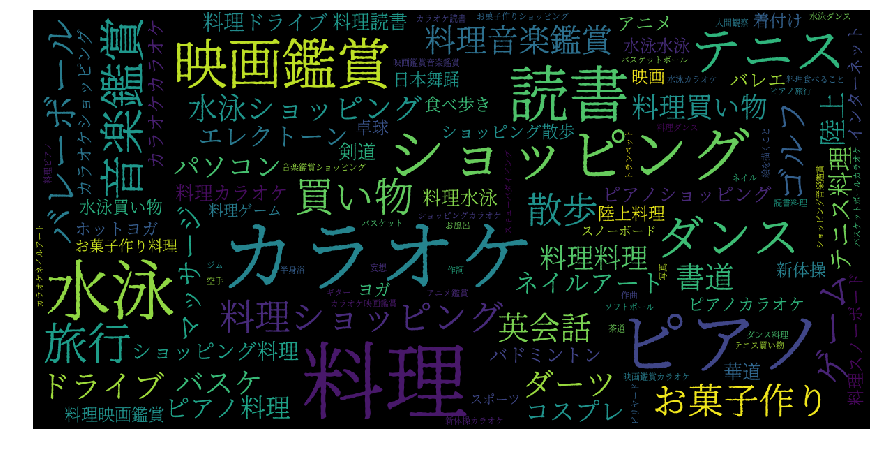

In [19]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Processing the Age

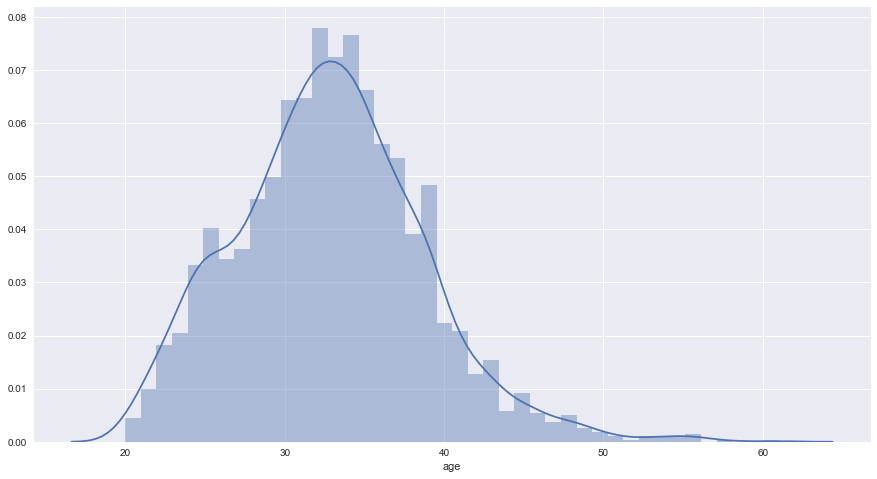

In [20]:
sns.set(color_codes=True)
sns.distplot(df['age']);

Set Age into three different categories:
- A will be between 20 years old
- B will be between 30 and 40 year old
- C will be 40 and above

In [21]:
df['age_cat'] = pd.cut(df['age'], bins=[20, 30, 40, float('Inf')], labels=['A', 'B', 'C'])

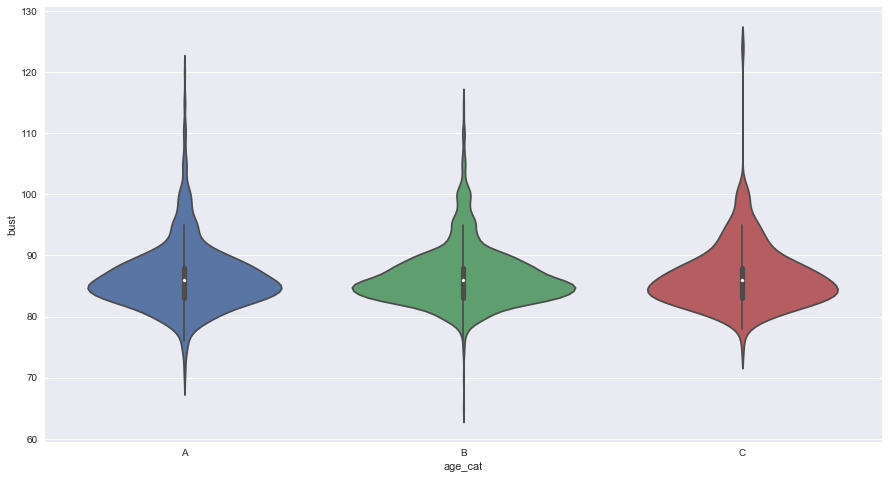

In [22]:
sns.violinplot(x='age_cat',y='bust',data=df)

### Process Prefectures

In [23]:
df = df[df['prefectures'].notnull()]
df = df[df['prefectures'] != '']

In [24]:
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim()

# Get latitude and longitude by using city name
def get_location(adress):
    location = geolocator.geocode(adress)
    return location.latitude, location.longitude

In [25]:
# Extract prefectures
prefecture_df = df['prefectures'].value_counts().reset_index()
prefecture_df.columns = ['prefectures', 'count']

In [26]:
# Remove non-senses data
prefecture_df = prefecture_df[prefecture_df['prefectures'] != '---']

In [27]:
# Get lat and lng
prefecture_df['location'] = 1
for index, row in prefecture_df.iterrows():
    count = 0
    while count < 5:
        try:
            prefecture_df.loc[index,'location'] = str(get_location(row['prefectures']))
            count = 6
        except:
            count += 1
    time.sleep(5)

In [40]:
# Split into lat and lng column
prefecture_temp = pd.DataFrame(prefecture_df['location'].str.split(' ',1).tolist(),columns = ['lat','lng'])
prefecture_df = pd.concat([prefecture_df['prefectures'], prefecture_df['count'], prefecture_temp], axis=1)

In [41]:
# Remove unused characters
prefecture_df['lat'] = prefecture_df['lat'].str.replace('(','')
prefecture_df['lat'] = prefecture_df['lat'].str.replace(',','')
prefecture_df['lng'] = prefecture_df['lng'].str.replace(')','')

In [42]:
prefecture_df['lat'] = prefecture_df['lat'].astype(float)
prefecture_df['lng'] = prefecture_df['lng'].astype(float)
prefecture_df['count'] = prefecture_df['count'].astype(float)

In [43]:
import folium
from folium.plugins import HeatMap

In [44]:
hmap = folium.Map(location=[35.9, 139.8], control_scale = True, attr='USGS style',zoom_start=5)

In [45]:
tmp_data = prefecture_df[['lat', 'lng', 'count']]
data = tmp_data.values.tolist()

In [46]:
HeatMap(data, radius=10).add_to(hmap)
hmap